In [1]:
#20220328 manuscript revision

In [2]:
import scvelo as scv
import loompy
import scanpy
#import scanpy.api
import igraph
import phate
import glob, os
import pandas as pd
import os
import re
import subprocess
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from copy import copy

In [3]:
ofile ="20210817_manuscript_preparation.h5ad"

In [4]:
ifile = "/projects/fs1/common/Hongzhe/Hongze_healthy_2020_10_downsampled_1000_2D_overclustered.h5ad"
adata = scv.read(ifile)

In [5]:
adata

AnnData object with n_obs × n_vars = 25067 × 21269
    obs: 'TotalUMIs', 'sname', 'n_counts', 'louvain', 'velocity_self_transition', 'velocity_clusters15', 'louvain15_merged.92', 'louvain15_merged.92_renamed', 'louvain15_merged.95', 'louvain15_merged.95_renamed', 'louvain15_merged.98', 'louvain15_merged.98_renamed', 'louvain11', 'louvain11_merged.95', 'louvain11_merged.95_renamed'
    var: 'Accession', 'AccessionVersion', 'Aliases', 'CcdsID', 'Chromosome', 'ChromosomeEnd', 'ChromosomeStart', 'CosmicID', 'DnaBindingDomain', 'FullName', 'GeneType', 'HgncID', 'IsTF', 'Location', 'LocationSortable', 'LocusGroup', 'LocusType', 'MgdID', 'MirBaseID', 'OmimID', 'PubmedID', 'RefseqID', 'RgdID', 'UcscID', 'UniprotID', 'VegaID', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_vari

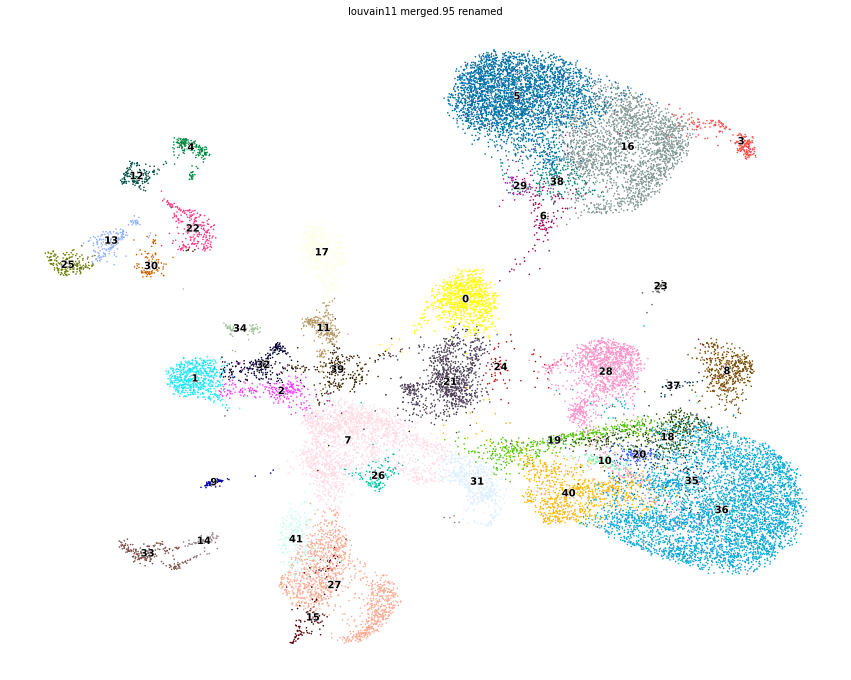

In [6]:
scv.pl.scatter(adata, color='louvain11_merged.95_renamed',size=10, figsize=(15,12))

In [7]:
#create non-hema subset

In [8]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37','28','0','39']
adata_non_hema = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]

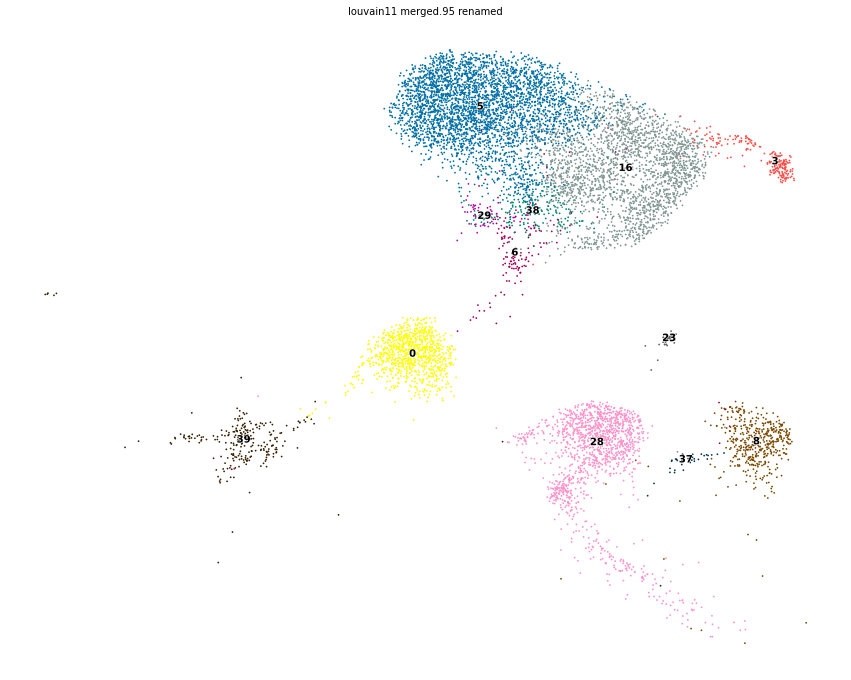

In [9]:
scv.pl.scatter(adata_non_hema, color='louvain11_merged.95_renamed', figsize=(15,12))

In [10]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37','28','0','39']
adata_non_hema = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]
lin=('3','5','16','38','29','23','6','37','8','28','0','39')
adata_non_hema.obs['louvain11_merged.95_renamed']=adata_non_hema.obs['louvain11_merged.95_renamed'].cat.reorder_categories(list(lin),ordered=True)

Trying to set attribute `.obs` of view, copying.


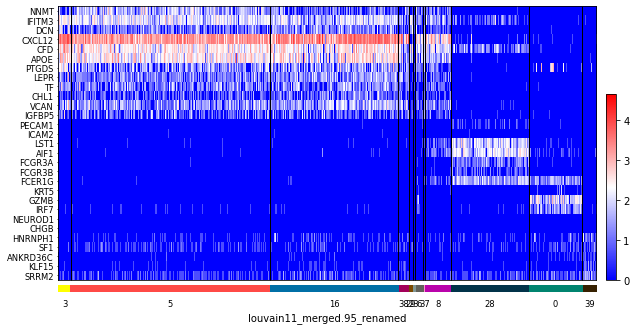

In [11]:
var_names=['NNMT','IFITM3','DCN','CXCL12', 'CFD','APOE','PTGDS','LEPR','TF','CHL1','VCAN','IGFBP5','PECAM1','ICAM2','LST1','AIF1','FCGR3A','FCGR3B','FCER1G','KRT5','GZMB','IRF7','NEUROD1','CHGB','HNRNPH1','SF1','ANKRD36C','KLF15','SRRM2']
scanpy.pl.heatmap(adata_non_hema, var_names, groupby='louvain11_merged.95_renamed',
                  swap_axes=True,cmap='bwr',show_gene_labels=True,save='heatmap_nonhema_20211024')

In [12]:
#reate MSC_rare_subset

In [13]:
louvain11_merged95_renamedGOI = ['38','29','23','6','37']
adata_MSC_rare_subsets = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]
lin=('38','29','23','6','37')
adata_MSC_rare_subsets.obs['louvain11_merged.95_renamed']=adata_MSC_rare_subsets.obs['louvain11_merged.95_renamed'].cat.reorder_categories(list(lin),ordered=True)

Trying to set attribute `.obs` of view, copying.


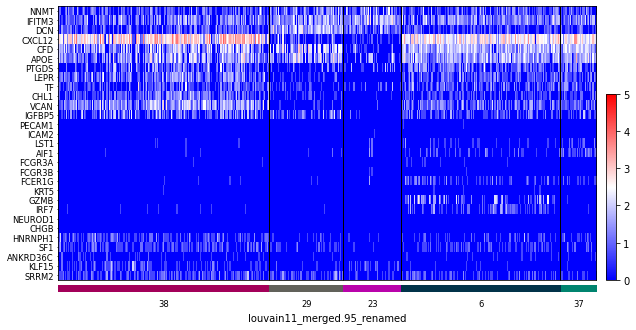

In [14]:
var_names=['NNMT','IFITM3','DCN','CXCL12', 'CFD','APOE','PTGDS','LEPR','TF','CHL1','VCAN','IGFBP5','PECAM1','ICAM2','LST1','AIF1','FCGR3A','FCGR3B','FCER1G','KRT5','GZMB','IRF7','NEUROD1','CHGB','HNRNPH1','SF1','ANKRD36C','KLF15','SRRM2']
scanpy.pl.heatmap(adata_MSC_rare_subsets, var_names, groupby='louvain11_merged.95_renamed',vmax=5,
                  swap_axes=True,cmap='bwr',show_gene_labels=True, save='HM_MSC_rare_subsets1')

In [15]:
# create_dataset_only_from_sorted_CD45-CD235A-

saving figure to file ./figures/scvelo_BM_only.pdf


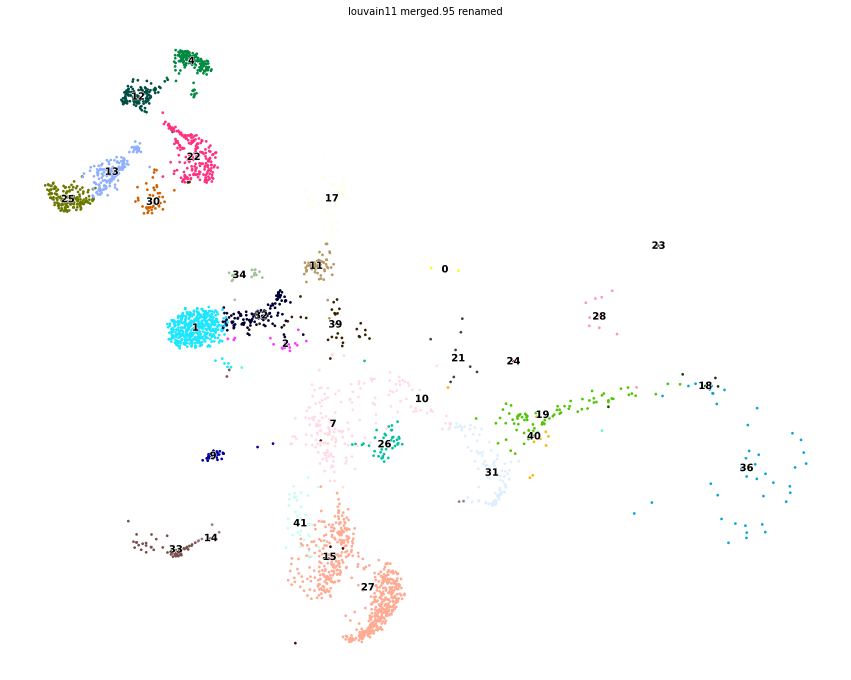

In [16]:
snames = [ 'BM_O1','BM_O2','HS_BM1','HS_BM2']
adata_BM = adata[adata.obs["sname"].isin( snames )]
scv.pl.scatter(adata_BM, color='louvain11_merged.95_renamed',size=30, figsize=(15,12), save='BM_only')

saving figure to file ./figures/scvelo_BM_only_CXCL12.pdf


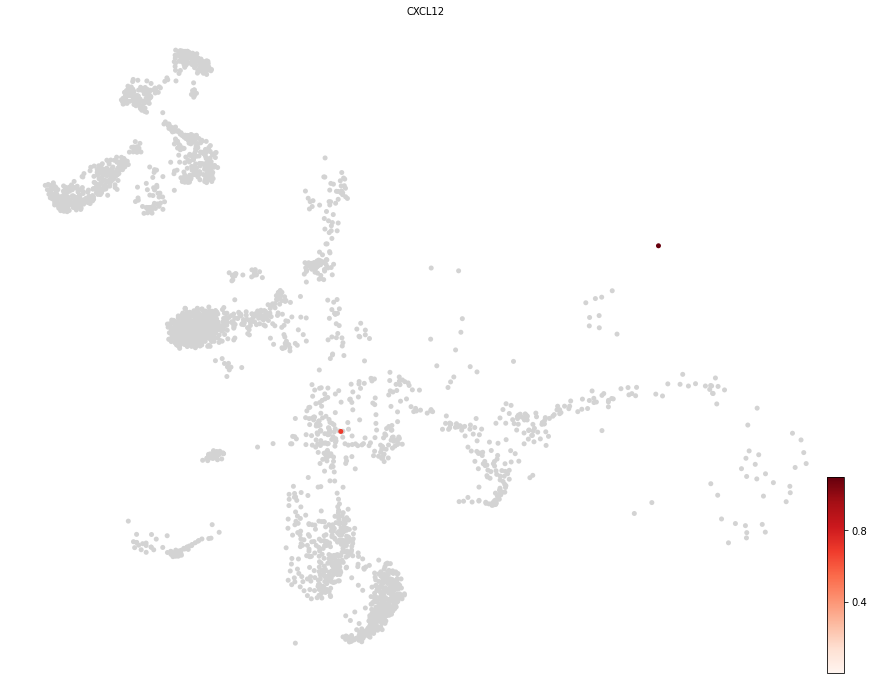

In [17]:
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")
scv.pl.umap(adata_BM, color='CXCL12', cmap=reds, vmin=0.00001, size=100, figsize=(15,12),save='BM_only_CXCL12')

In [18]:
#create_dataset_only_from_sorted_CD271+

saving figure to file ./figures/scvelo_lovain_sorted_271_size10.pdf


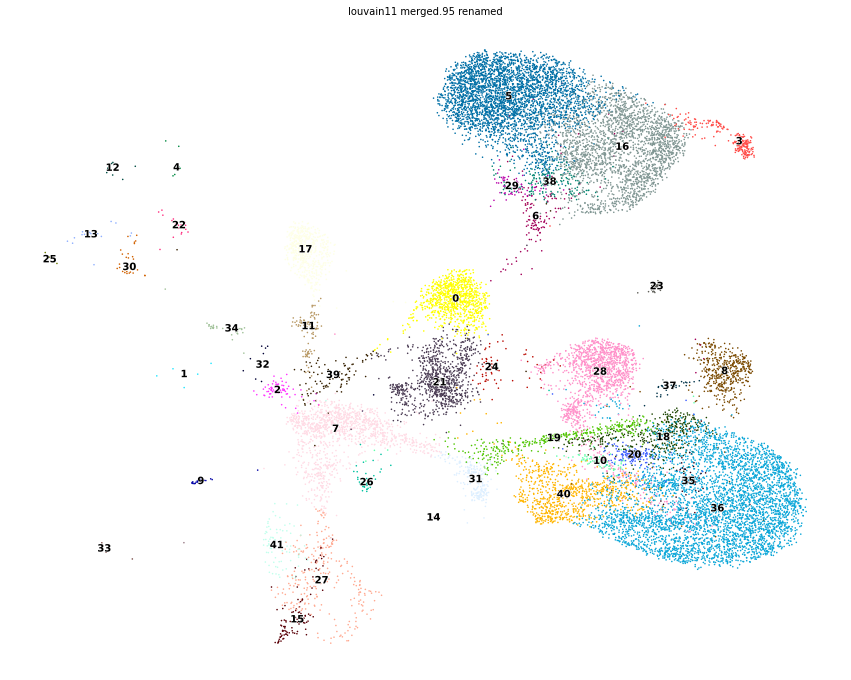

In [19]:
snames = [ 'MSC_O1','MSC_O2','MSC_Y2','MSC_Y3','Y1']
adata_sorted_271 = adata[adata.obs["sname"].isin( snames )]
scv.pl.scatter(adata_sorted_271, color='louvain11_merged.95_renamed',size=10, figsize=(15,12),save='lovain_sorted_271_size10' )

saving figure to file ./figures/scvelo_BM_only_CXCL12.pdf


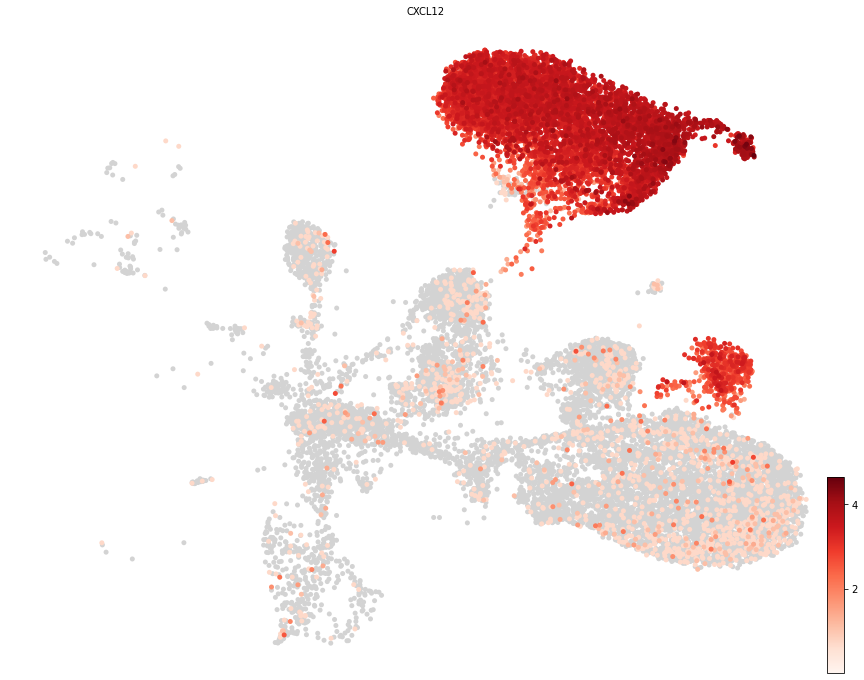

In [20]:
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")
scv.pl.umap(adata_sorted_271, color='CXCL12', cmap=reds, vmin=0.00001, size=100, figsize=(15,12),save='BM_only_CXCL12')

saving figure to file ./figures/scvelo_L11_95_legend.pdf


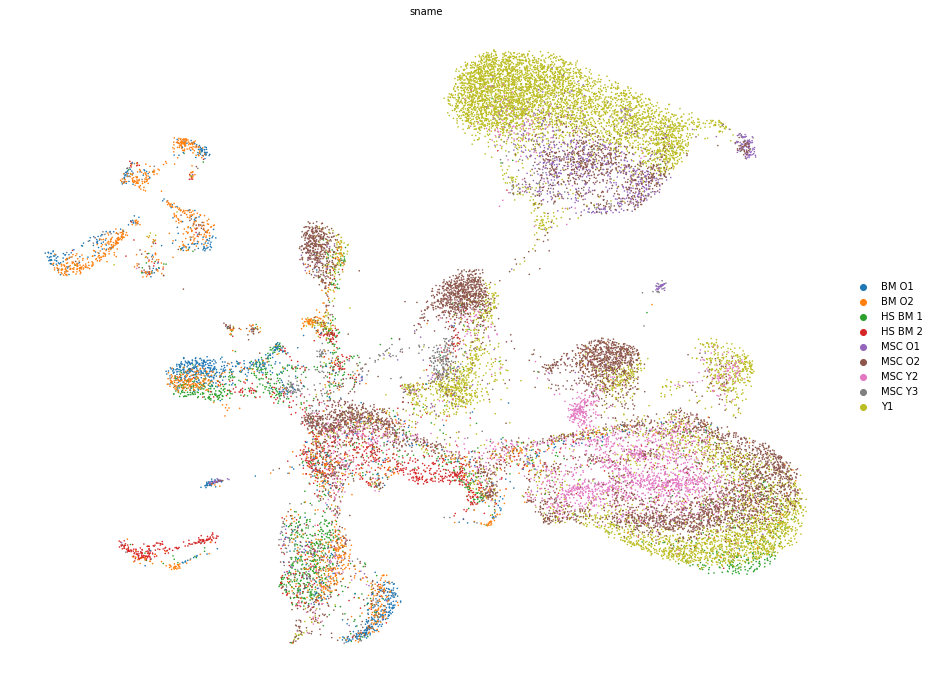

In [21]:
scv.pl.scatter(adata, color='sname',size=10, figsize=(15,12),legend_loc='right margin', save='L11_95_legend')

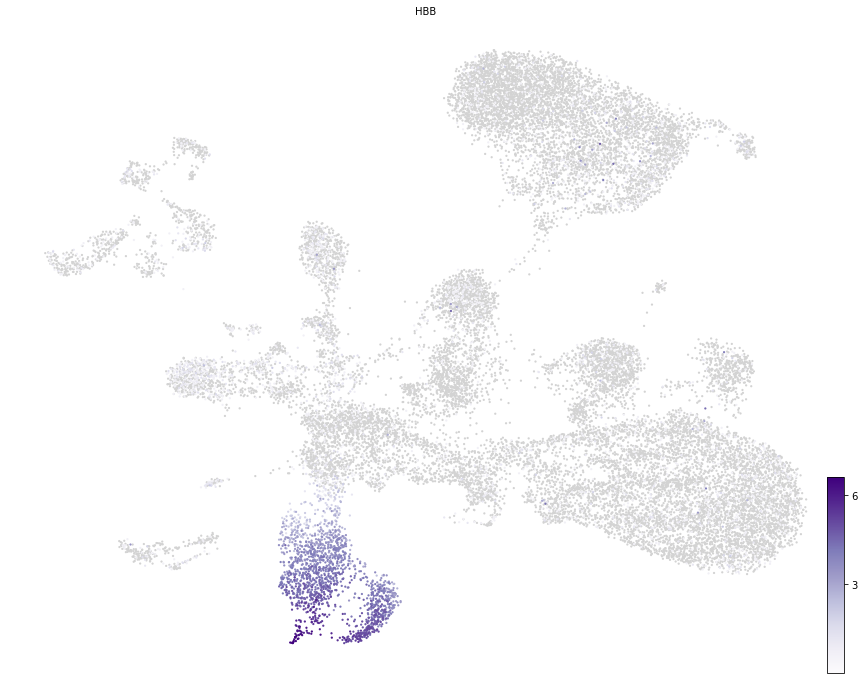

In [22]:
purples = copy(mpl.cm.Purples)
purples.set_under("lightgray")
scv.pl.umap(adata, color='HBB', cmap=purples, vmin=0.00001, size=20, figsize=(15,12))

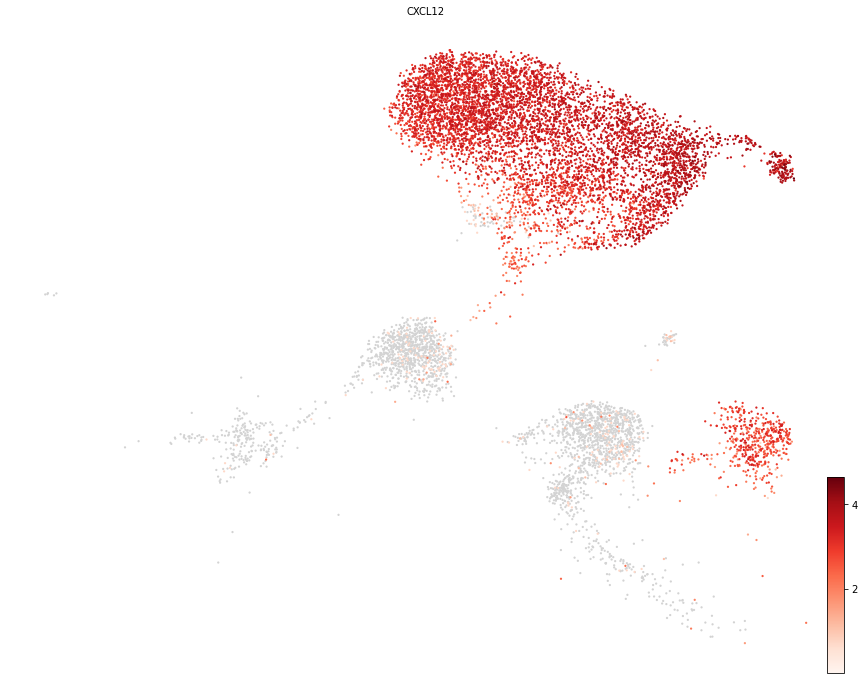

In [23]:
reds = copy(mpl.cm.Reds)
reds.set_under("lightgray")
scv.pl.umap(adata_non_hema, color='CXCL12', cmap=reds, vmin=0.00001, size=20, figsize=(15,12))

In [25]:
# create_stromal_subsets

In [26]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37']
adata_MSC = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]

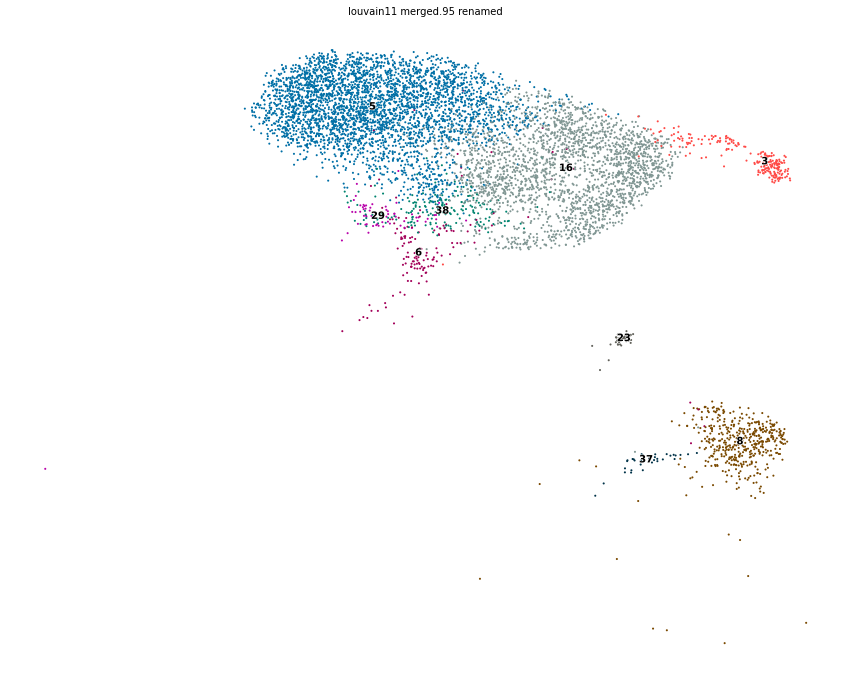

In [27]:
scv.pl.scatter(adata_MSC, color='louvain11_merged.95_renamed', figsize=(15,12))

In [28]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','23','38','6','8', '37']
adata_MSC = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]
lin=('3','5','16','38','29','23','6','37','8')
adata_MSC.obs['louvain11_merged.95_renamed']=adata_MSC.obs['louvain11_merged.95_renamed'].cat.reorder_categories(list(lin),ordered=True)

Trying to set attribute `.obs` of view, copying.


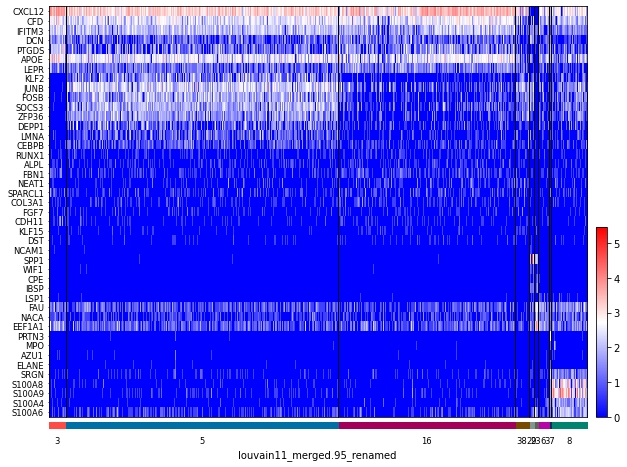

In [29]:
var_names=['CXCL12','CFD','IFITM3','DCN','PTGDS','APOE','LEPR','KLF2','JUNB','FOSB','SOCS3','ZFP36','DEPP1','LMNA','CEBPB','RUNX1','ALPL','FBN1','NEAT1','SPARCL1','COL3A1','FGF7','CDH11','KLF15','DST','NCAM1','SPP1','WIF1','CPE','IBSP','LSP1','FAU','NACA','EEF1A1','PRTN3','MPO','AZU1','ELANE','SRGN','S100A8','S100A9','S100A4','S100A6']
scanpy.pl.heatmap(adata_MSC, var_names, groupby='louvain11_merged.95_renamed',
                  swap_axes=True,cmap='bwr',show_gene_labels=True, save='MSC_HM')

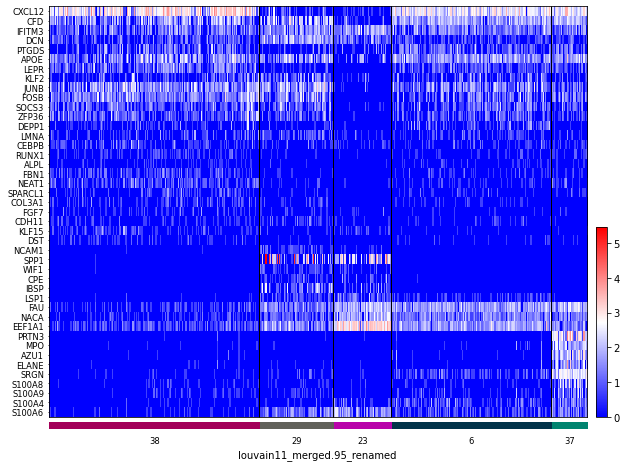

In [30]:
var_names=['CXCL12','CFD','IFITM3','DCN','PTGDS','APOE','LEPR','KLF2','JUNB','FOSB','SOCS3','ZFP36','DEPP1','LMNA','CEBPB','RUNX1','ALPL','FBN1','NEAT1','SPARCL1','COL3A1','FGF7','CDH11','KLF15','DST','NCAM1','SPP1','WIF1','CPE','IBSP','LSP1','FAU','NACA','EEF1A1','PRTN3','MPO','AZU1','ELANE','SRGN','S100A8','S100A9','S100A4','S100A6']
scanpy.pl.heatmap(adata_MSC_rare_subsets, var_names, groupby='louvain11_merged.95_renamed',
                  swap_axes=True,cmap='bwr',show_gene_labels=True, save='MSC_HM')

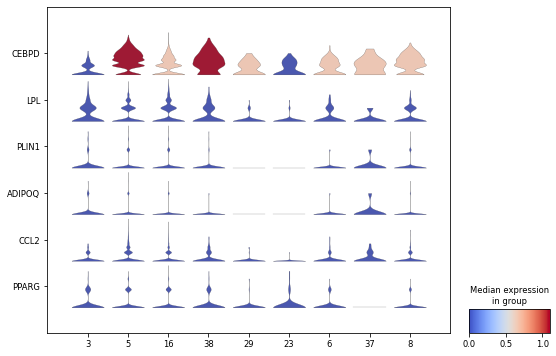

In [31]:
var_names=['CEBPD','LPL','PLIN1','ADIPOQ','CCL2','PPARG']
scanpy.pl.stacked_violin(adata_MSC,var_names, groupby='louvain11_merged.95_renamed',
                  swap_axes=True,cmap='coolwarm',figsize=(9,6),save='adipo_marker')

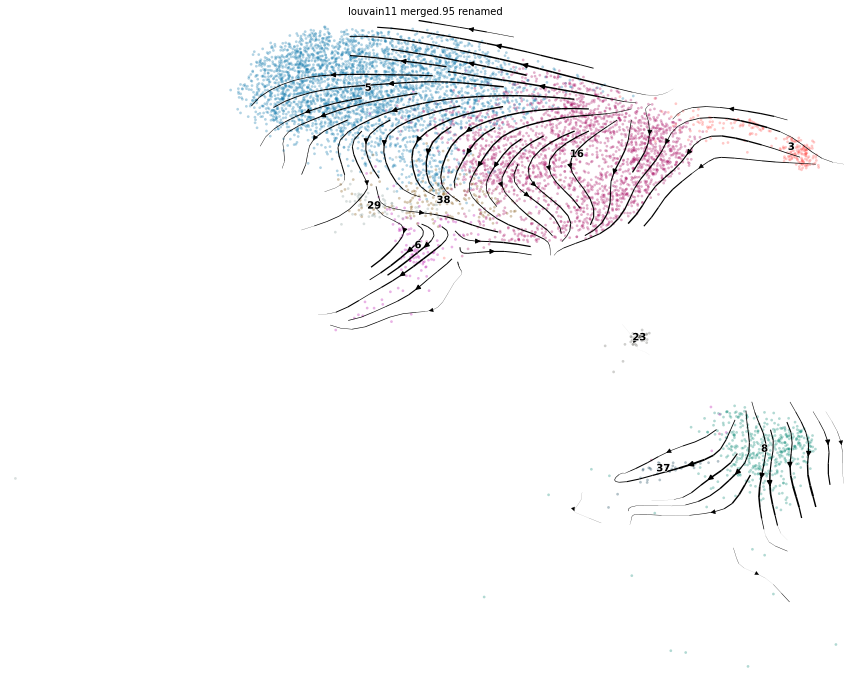

In [32]:
scv.pl.velocity_embedding_stream(adata_MSC, basis='umap',color='louvain11_merged.95_renamed',size= 30,figsize=(15,12))

In [33]:
# create_MSC_main_continuum

In [34]:
louvain11_merged95_renamedGOI = ['3','5', '16','29','38','6']
adata_MSC_main = adata[adata.obs['louvain11_merged.95_renamed'].isin(louvain11_merged95_renamedGOI)]

Trying to set attribute `.obs` of view, copying.


saving figure to file ./figures/scvelo_MSCmain_streamline_reso0.35.pdf


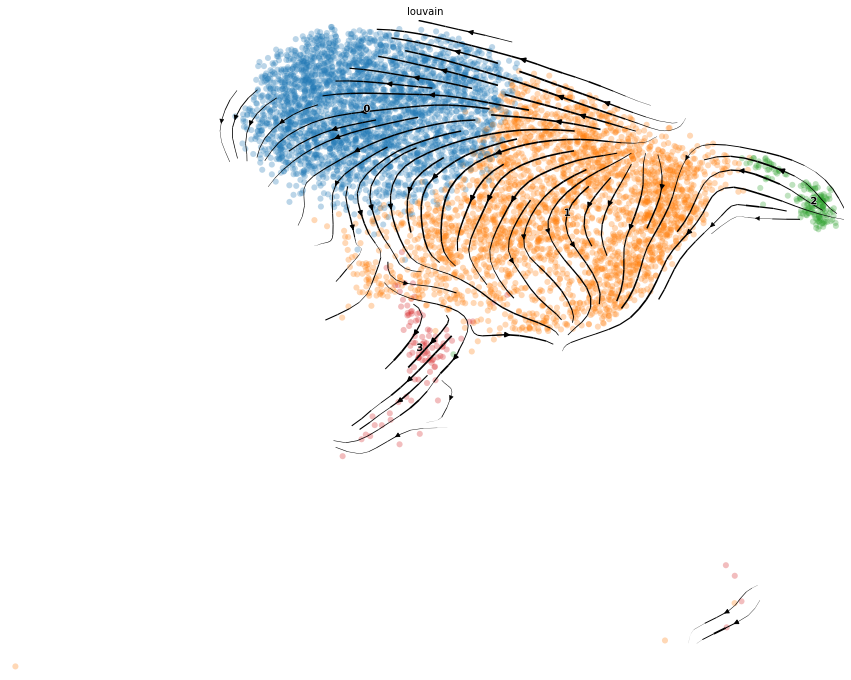

In [35]:
scv.tl.louvain(adata_MSC_main,resolution=0.35)
scv.pl.velocity_embedding_stream(adata_MSC_main, basis='umap',figsize=(15,12),save='MSCmain_streamline_reso0.35')

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing terminal states
    identified 4 regions of root cells and 2 regions of end points .
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:06) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_MSC_latent_time.pdf


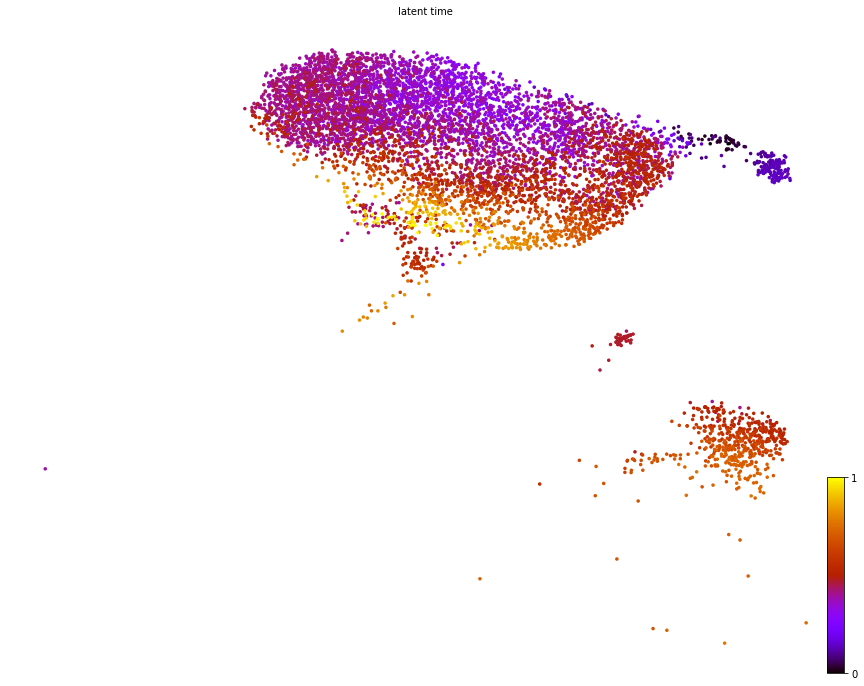

In [36]:
scv.tl.latent_time(adata_MSC)
scv.pl.scatter(adata_MSC, color='latent_time', color_map='gnuplot', size=50, colorbar=True,figsize=(15,12),save='MSC_latent_time')

computing latent time using root_cells as prior
    finished (0:00:06) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_MSCmain_latent_time.pdf


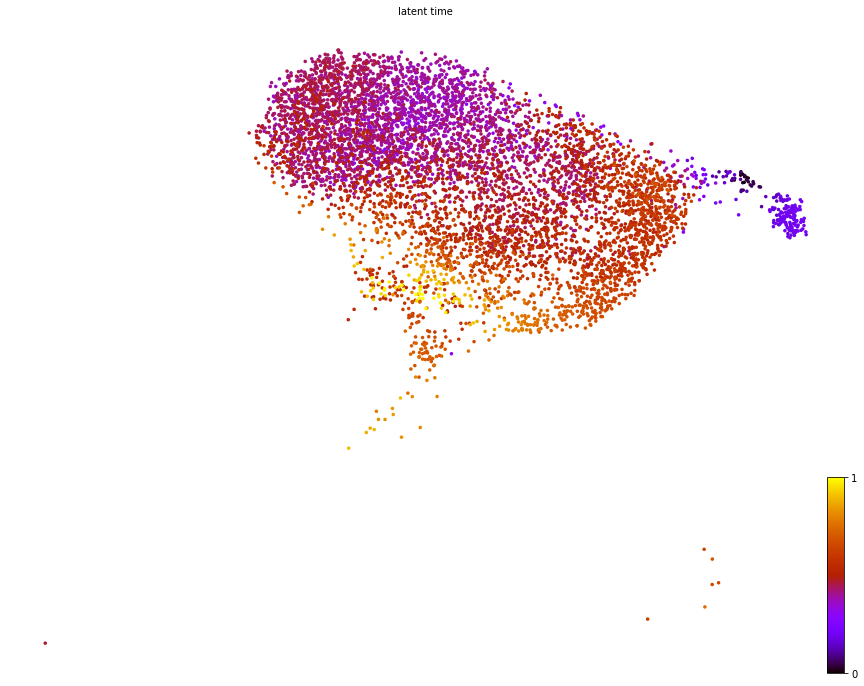

In [44]:
scv.tl.latent_time(adata_MSC_main)
scv.pl.scatter(adata_MSC_main, color='latent_time', color_map='gnuplot', size=50, colorbar=True,figsize=(15,12),save='MSCmain_latent_time')

saving figure to file ./figures/scvelo_MSCmain_pseudotime.pdf


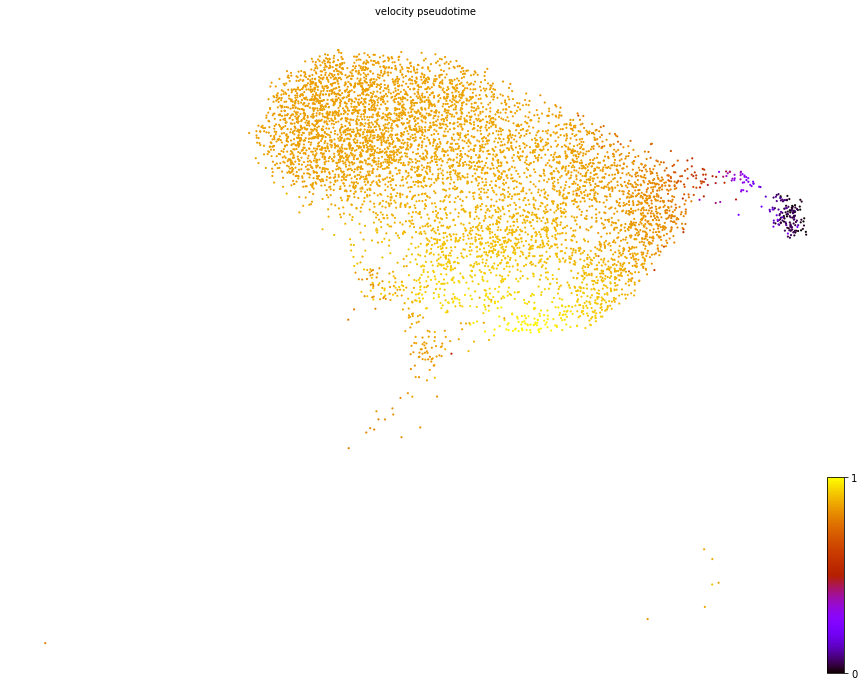

In [38]:
scv.tl.velocity_pseudotime(adata_MSC_main)
scv.pl.scatter(adata_MSC_main, color='velocity_pseudotime', cmap='gnuplot',figsize=(15,12),save='MSCmain_pseudotime')

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
saving figure to file ./figures/scvelo_MSCmain_velocity_confidence.pdf


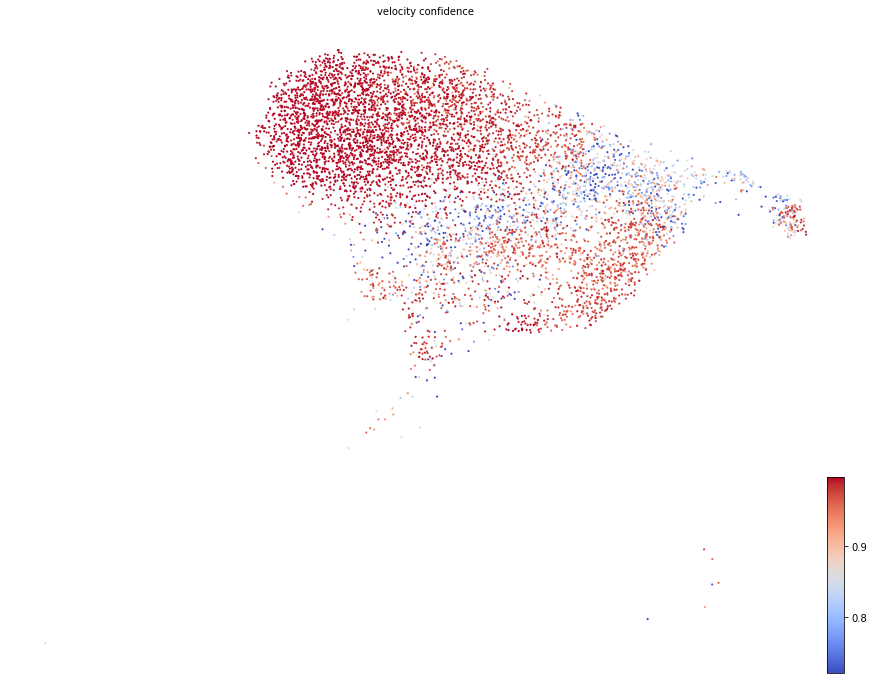

In [39]:
scv.tl.velocity_confidence(adata_MSC_main)
scv.pl.scatter(adata_MSC_main, color='velocity_confidence', perc=[5,95],cmap='coolwarm',figsize=(15,12),save='MSCmain_velocity_confidence')

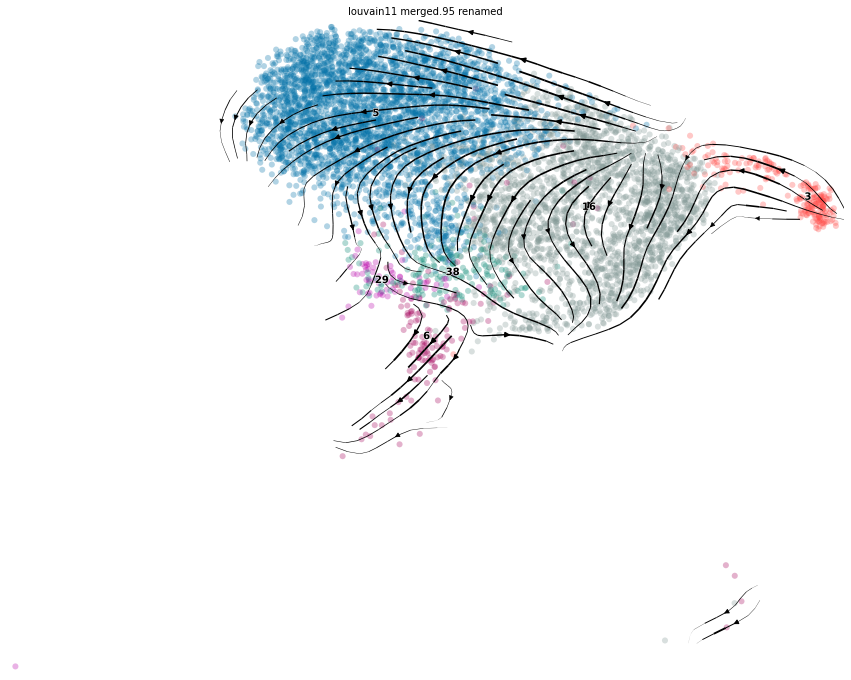

In [40]:
scv.pl.velocity_embedding_stream(adata_MSC_main, color='louvain11_merged.95_renamed', basis='umap',figsize=(15,12))

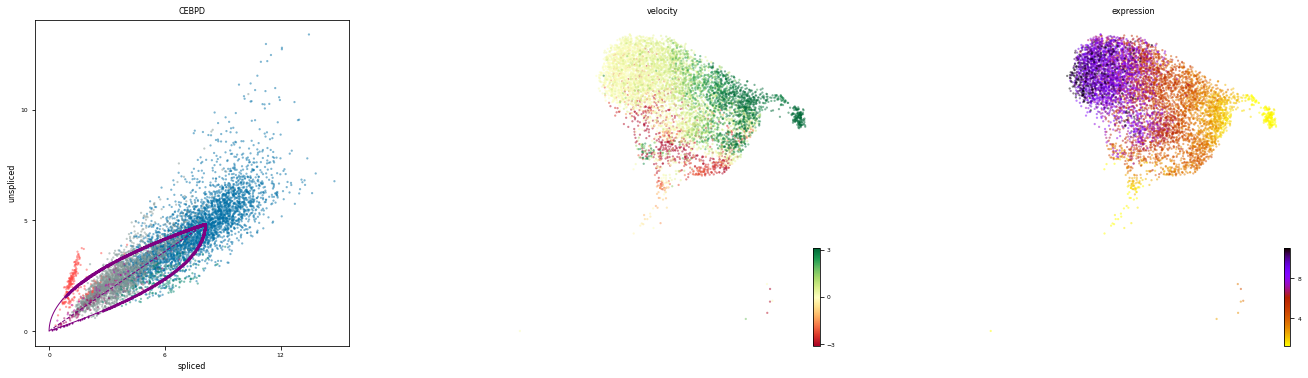

In [41]:
scv.pl.velocity(adata_MSC_main, ['CEBPD'],size=20,color='louvain11_merged.95_renamed',figsize=(15,12))

computing latent time using root_cells as prior
    finished (0:00:06) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_MSCmain_latent_time.pdf


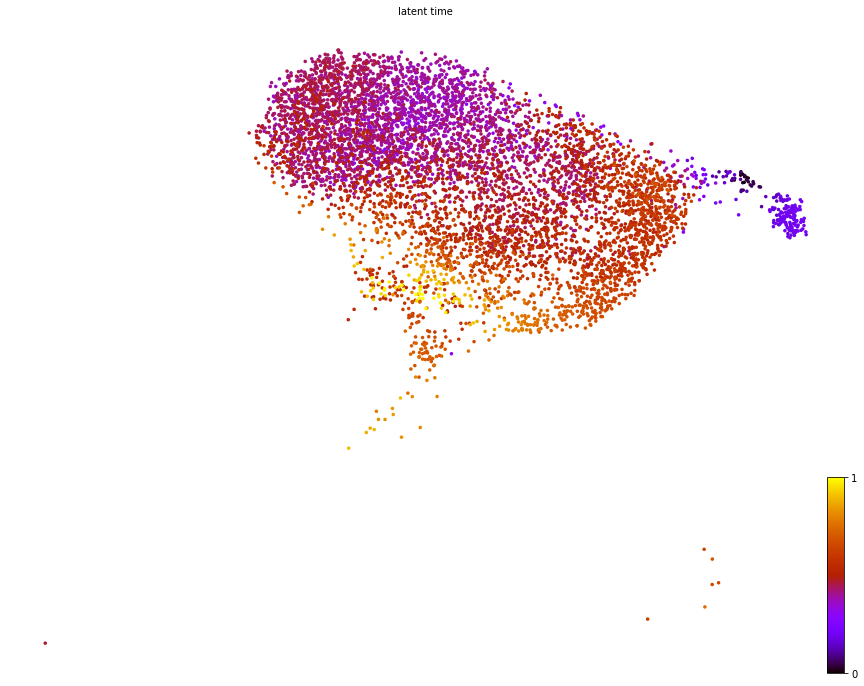

In [46]:
scv.tl.latent_time(adata_MSC_main)
scv.pl.scatter(adata_MSC_main, color='latent_time', color_map='gnuplot', size=50, colorbar=True,figsize=(15,12),save='MSCmain_latent_time')

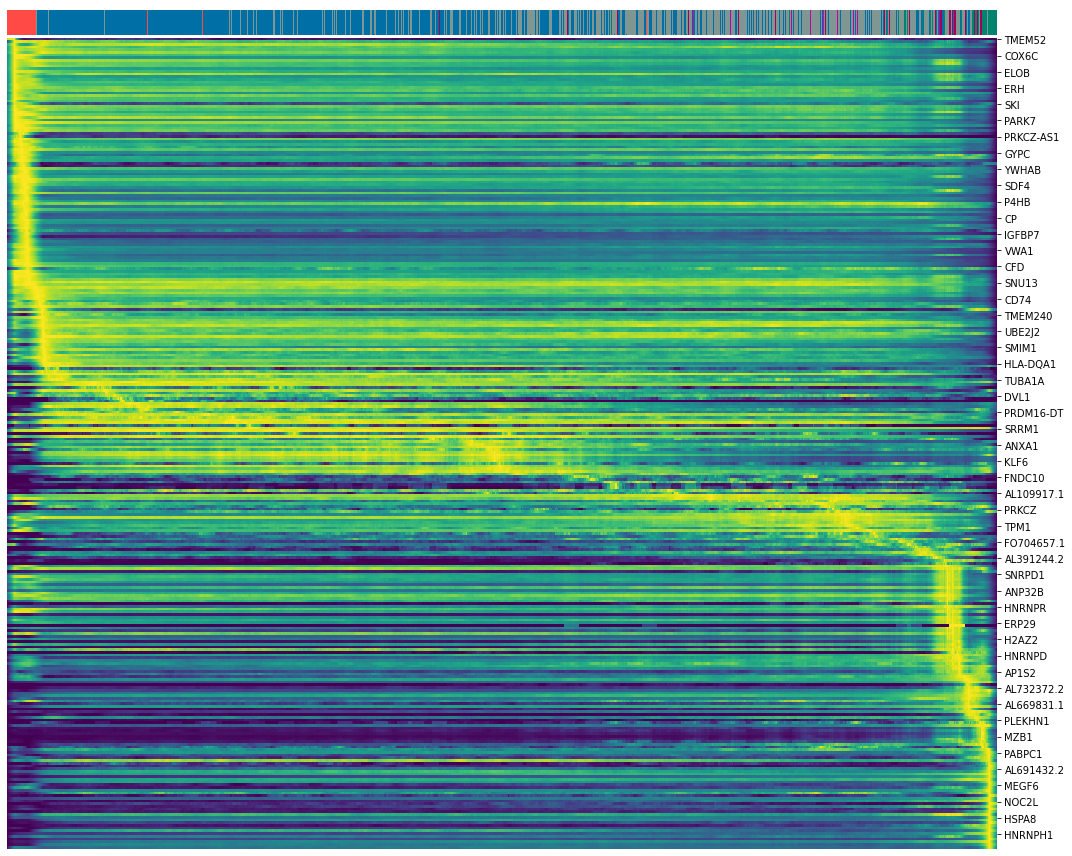

In [51]:
top_genes = adata_MSC_main.var['fit_likelihood'].sort_values(ascending=False).index[:300] 
scv.pl.heatmap(adata_MSC_main, var_names=top_genes, sortby='latent_time', col_color='louvain11_merged.95_renamed', n_convolve=100,figsize=(15,12))

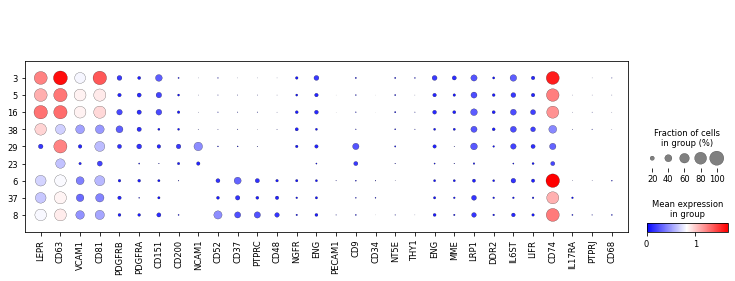

In [53]:
var_names=['LEPR','CD63','VCAM1','CD81','PDGFRB','PDGFRA','CD151','CD200','NCAM1','CD52','CD37','PTPRC','CD48','NGFR','ENG','PECAM1','CD9','CD34','NT5E','THY1','ENG','MME','LRP1','DDR2','IL6ST','LIFR','CD74','IL17RA','PTPRJ','CD68']
scanpy.pl.dotplot(adata_MSC,var_names, groupby='louvain11_merged.95_renamed',cmap='bwr')